In [184]:
import pandas as pd
import numpy as np
import pickle 
from datetime import datetime

with open('riaa_df.pkl', 'rb') as f:
        riaa_df = pickle.load(f)
with open('song_df.pkl', 'rb') as f:
        song_df = pickle.load(f)


0                             Someone You Loved
1                                       Circles
2                                      Senorita
3                                   Truth Hurts
4                           Lose You To Love Me
                          ...                  
113195                               In A Dream
113196                                 The Note
113197                                 Jealousy
113198    Don't Be Stupid (You Know I Love You)
113199                                  What If
Name: title, Length: 113200, dtype: object

In [187]:
rec_df

,numberofappearances,bestrank,join
0,26,1,Lewis CapaldiSomeone You Loved
1,10,2,Post MaloneCircles
2,20,1,Shawn Mendes & Camila CabelloSenorita
3,27,1,LizzoTruth Hurts
4,3,1,Selena GomezLose You To Love Me
...,...,...,...
113195,1,96,RockellIn A Dream
113196,1,97,Daryle SingletaryThe Note
113197,1,98,Kim SandersJealousy
113198,1,99,Shania TwainDon't Be Stupid (You Know I Love You)


In [188]:
song_df["join"] = song_df["artist"] + song_df["title"]
song_df.merge(rec_df,on="join")

,artist,title,isnew,rank,date,spotify_id,spotify_explicit,spotify_duration_ms,spotify_disc_number,spotify_track_number,...,spotify_tempo,spotify_time_signature,spotify_album_id,spotify_album_release_date,spotify_album_release_date_precision,album_label,num_artists,join,numberofappearances,bestrank
0,Lewis Capaldi,Someone You Loved,False,1,2019-11-16,7qEHsqek33rTcFNT9PFqLf,False,182160.0,1.0,4.0,...,109.891,4.0,5658aM19fA3JVwTK6eQX70,2019-05-17,day,Vertigo Berlin,1.0,Lewis CapaldiSomeone You Loved,26,1
1,Lewis Capaldi,Someone You Loved,False,1,2019-11-16,7qEHsqek33rTcFNT9PFqLf,False,182160.0,1.0,4.0,...,109.891,4.0,5658aM19fA3JVwTK6eQX70,2019-05-17,day,Vertigo Berlin,1.0,Lewis CapaldiSomeone You Loved,25,1
2,Lewis Capaldi,Someone You Loved,False,1,2019-11-16,7qEHsqek33rTcFNT9PFqLf,False,182160.0,1.0,4.0,...,109.891,4.0,5658aM19fA3JVwTK6eQX70,2019-05-17,day,Vertigo Berlin,1.0,Lewis CapaldiSomeone You Loved,24,1
3,Lewis Capaldi,Someone You Loved,False,1,2019-11-16,7qEHsqek33rTcFNT9PFqLf,False,182160.0,1.0,4.0,...,109.891,4.0,5658aM19fA3JVwTK6eQX70,2019-05-17,day,Vertigo Berlin,1.0,Lewis CapaldiSomeone You Loved,23,3
4,Lewis Capaldi,Someone You Loved,False,1,2019-11-16,7qEHsqek33rTcFNT9PFqLf,False,182160.0,1.0,4.0,...,109.891,4.0,5658aM19fA3JVwTK6eQX70,2019-05-17,day,Vertigo Berlin,1.0,Lewis CapaldiSomeone You Loved,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113195,Spice Girls,Spice Up Your Life,False,79,1998-03-21,5qGwqO0lkbBXw4xNfzT7SF,False,173666.0,1.0,1.0,...,124.016,4.0,3sr6lAuO3nmB1u8ZuQgpiX,1997-01-01,day,Virgin Records,1.0,Spice GirlsSpice Up Your Life,1,79
113196,Phajja,"So Long (Well, Well, Well)",False,93,1998-03-21,7phS4S15qLjPC7JlFnzWql,False,262333.0,1.0,23.0,...,79.913,4.0,6qbvgcaWgMn2BQY6FhdOm2,2018-11-16,day,Warner Music Group - X5 Music Group,1.0,"PhajjaSo Long (Well, Well, Well)",1,93
113197,Sting & The Police,Roxanne `97 - Puff Daddy Remix,False,95,1998-03-21,0RlWNvJKKp0gODH7sUwm1j,False,275493.0,1.0,7.0,...,97.518,4.0,0Av1HIrrBAtIbQTaAqo8Lb,2011-11-07,day,2011 Ameritz Music Ltd,1.0,Sting & The PoliceRoxanne `97 - Puff Daddy Remix,1,95
113198,Shania Twain,Don't Be Stupid (You Know I Love You),False,99,1998-03-21,6xAF3xYDK915NEvC6WNbj9,False,214240.0,1.0,4.0,...,122.025,4.0,4UMe0Ods7kygK6OISasZe9,1997-11-04,day,Mercury Nashville,1.0,Shania TwainDon't Be Stupid (You Know I Love You),1,99


In [189]:
riaa_df["award_datetime"] = riaa_df["award_date"].apply(lambda x: datetime.strptime(x.strip(),"%B %d, %Y"))
song_df["spotify_album_release_date_datetime"] = song_df["spotify_album_release_date"].apply(lambda x: datetime.strptime(x.strip(),"%Y-%m-%d") if len(str(x))>8 else x)

In [190]:
riaa_df["award"] = riaa_df["award"].apply(lambda x: x.strip())

In [219]:
keywords = ["Featuring","Feauring", "featuring", "&",","," X ", " x ","Presents", "From", "Or","And",]
for song in song_df.index:
    date = song_df.loc[song,"spotify_album_release_date_datetime"]
    artist_df = riaa_df[riaa_df["award_datetime"] <= date]
    artist = song_df.loc[song,"artist"]
    last_award_list = list()
    award_num_list = list()
    num_songs_awards = list()
    gold_count = list()
    platinum_count = list()
    
    artist_list = list()
    artist_list.append(artist)
    for keyword in keywords:
        artist_list.extend(artist.split(keyword))
    artist_list = list(set(artist_list))
    
    if len(str(date)) >8:
        for performer in artist_list:
            artist_df1 = artist_df[artist_df["artist"] == performer.strip()].sort_values("award_datetime",ascending=False)
            if len(artist_df1)>0:
                gold_count.append(artist_df1[artist_df1["award"] == "Gold"].count()["award"])
                artist_df1 = artist_df1.sort_values("award_datetime",ascending=False).drop_duplicates("songs")
                num_songs_awards.append(len(artist_df1["songs"].value_counts()))
                platinum_count.append(artist_df1[artist_df1["award"] == "Platinum"].sum()["award_num"])
                last_award_list.append(artist_df1.iloc[0]["award"])
                award_num_list.append(gold_count[-1] + platinum_count[-1])
            else:
                last_award_list.append(None)
                award_num_list.append(0)
                gold_count.append(0)
                platinum_count.append(0)
                num_songs_awards.append(0)
 
        max_index = award_num_list.index(max(award_num_list))
        song_df.loc[song,"last_award_type"] = last_award_list[max_index]
        song_df.loc[song,"award_num"] = award_num_list[max_index]
        song_df.loc[song,"gold_count"] = gold_count[max_index]
        song_df.loc[song,"platinum_count"] = platinum_count[max_index]
        song_df.loc[song,"num_songs_awards"] = num_songs_awards[max_index]

In [220]:
song_df.sort_values("award_num",ascending=False)

,artist,title,isnew,rank,date,spotify_id,spotify_explicit,spotify_duration_ms,spotify_disc_number,spotify_track_number,...,album_label,num_artists,join,spotify_album_release_date_datetime,last_award_type,award_num,gold_count,platinum_count,artist_has_award,num_songs_awards
1298,J Balvin & Bad Bunny,Que Pretendes,False,99,2019-08-24,20n41vo7zF4sV5T3frrs35,False,222346.0,1.0,2.0,...,"UMG Recordings, Inc.",2.0,J Balvin & Bad BunnyQue Pretendes,2019-11-15,Platinum,176.0,27.0,149.0,True,27.0
10093,Garth Brooks,Ask Me How I Know,False,94,2017-12-23,55YVVetvm37z3oTHrdD5dV,False,211570.0,1.0,1.0,...,The Karaoke Studio,1.0,Garth BrooksAsk Me How I Know,2017-12-17,Platinum,170.0,30.0,140.0,True,30.0
281,"Sech, Darell, Nicky Jam, Ozuna & Anuel AA",Otro Trago,False,82,2019-11-02,4bTZeO72FwMa6wKOiqoynL,True,287773.0,1.0,1.0,...,Rich Music,5.0,"Sech, Darell, Nicky Jam, Ozuna & Anuel AAOtro ...",2019-07-26,Platinum,166.0,10.0,156.0,True,10.0
1995,"DJ Khaled Featuring Meek Mill, J Balvin, Lil B...",You Stay,False,96,2019-07-06,4U6ubKsTd8RBDP5tPPhh7I,True,275275.0,1.0,5.0,...,Epic/We The Best,5.0,"DJ Khaled Featuring Meek Mill, J Balvin, Lil B...",2019-05-17,Platinum,164.0,20.0,144.0,True,20.0
8896,Becky G Featuring Bad Bunny,Mayores,False,97,2018-03-10,2AY1UAimvTqjJC8vDJsOyy,False,203186.0,1.0,16.0,...,Kemosabe Records/RCA Records/Sony Music Latin,2.0,Becky G Featuring Bad BunnyMayores,2019-10-18,Platinum,159.0,30.0,129.0,True,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111863,INOJ/LATHUN,Love You Down,False,64,1998-06-20,None,NaN,NaN,NaN,NaN,...,NaN,NaN,INOJ/LATHUNLove You Down,NaT,NaN,NaN,NaN,NaN,False,NaN
112299,Innerlude,I Don't Wanna Go On,False,100,1998-05-23,None,NaN,NaN,NaN,NaN,...,NaN,NaN,InnerludeI Don't Wanna Go On,NaT,NaN,NaN,NaN,NaN,False,NaN
112694,PRINCE BE & Ky-Mani,Gotta Be...Movin' On Up,False,95,1998-04-25,None,NaN,NaN,NaN,NaN,...,NaN,NaN,PRINCE BE & Ky-ManiGotta Be...Movin' On Up,NaT,NaN,NaN,NaN,NaN,False,NaN
112696,KAI,Say You'll Stay,False,97,1998-04-25,None,NaN,NaN,NaN,NaN,...,NaN,NaN,KAISay You'll Stay,NaT,NaN,NaN,NaN,NaN,False,NaN


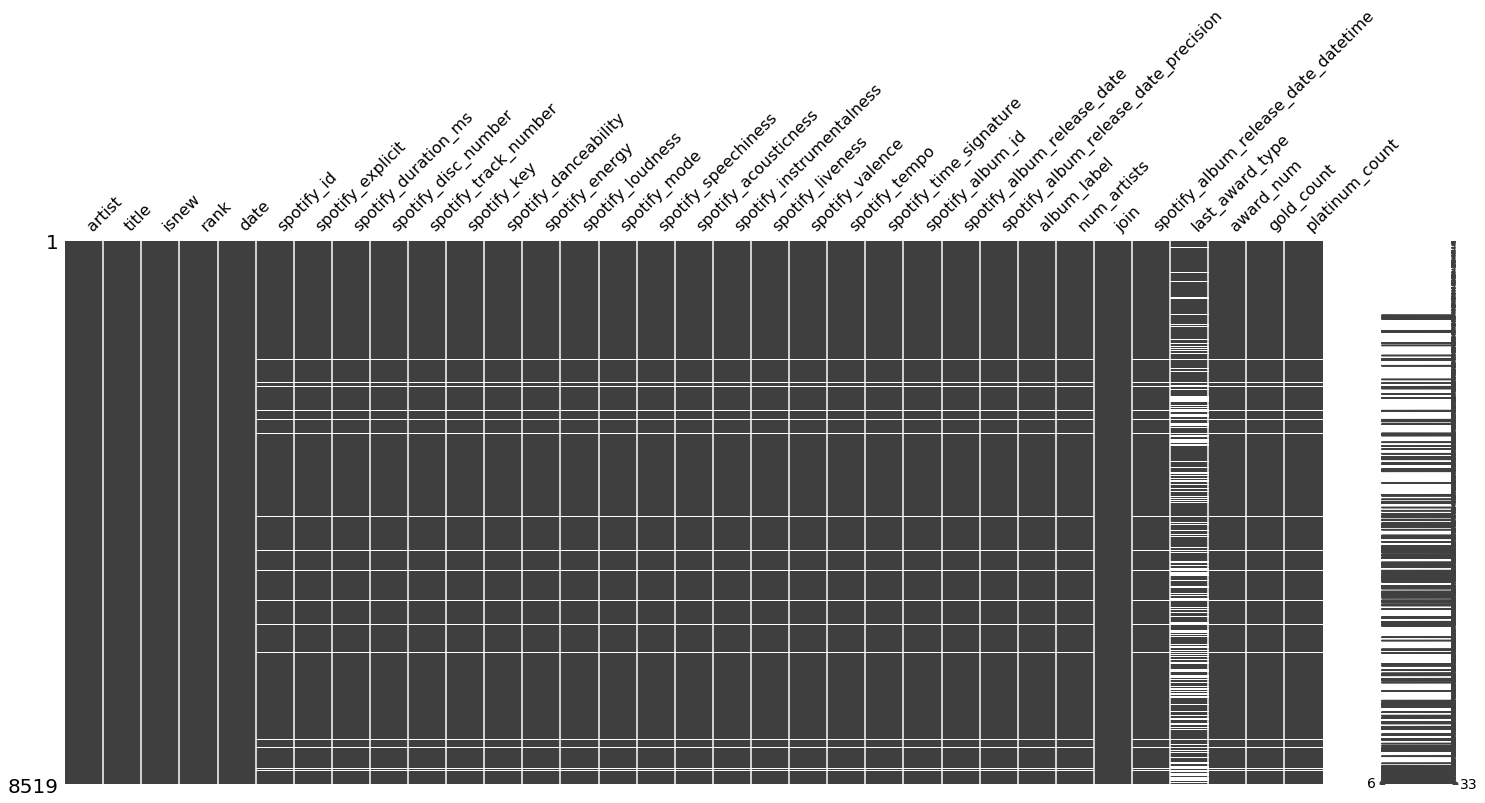

In [193]:
import missingno as msno
import matplotlib.pyplot as plt
import joypy

%matplotlib inline
msno.matrix(song_df)

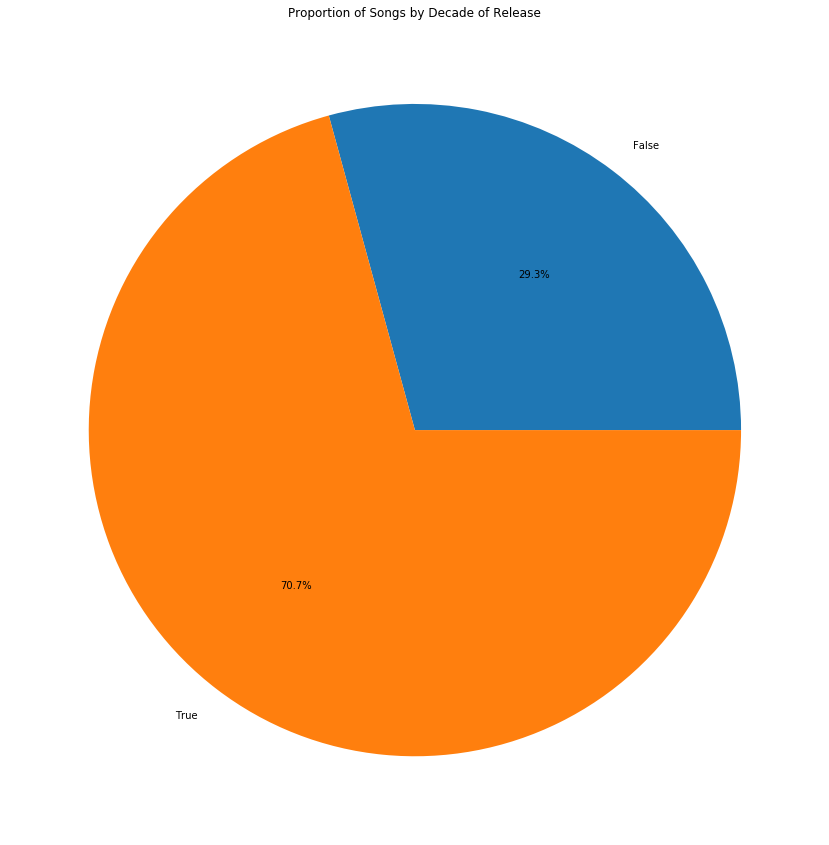

In [196]:
song_df["artist_has_award"] = song_df["award_num"] > 0
plt.figure(figsize=(15,15))
plt.pie(song_df.groupby("artist_has_award").count()["artist"],autopct ="%1.1f%%",labels=song_df.groupby("artist_has_award").count()["artist"].index)
plt.title("Proportion of Songs by Decade of Release")
plt.show()

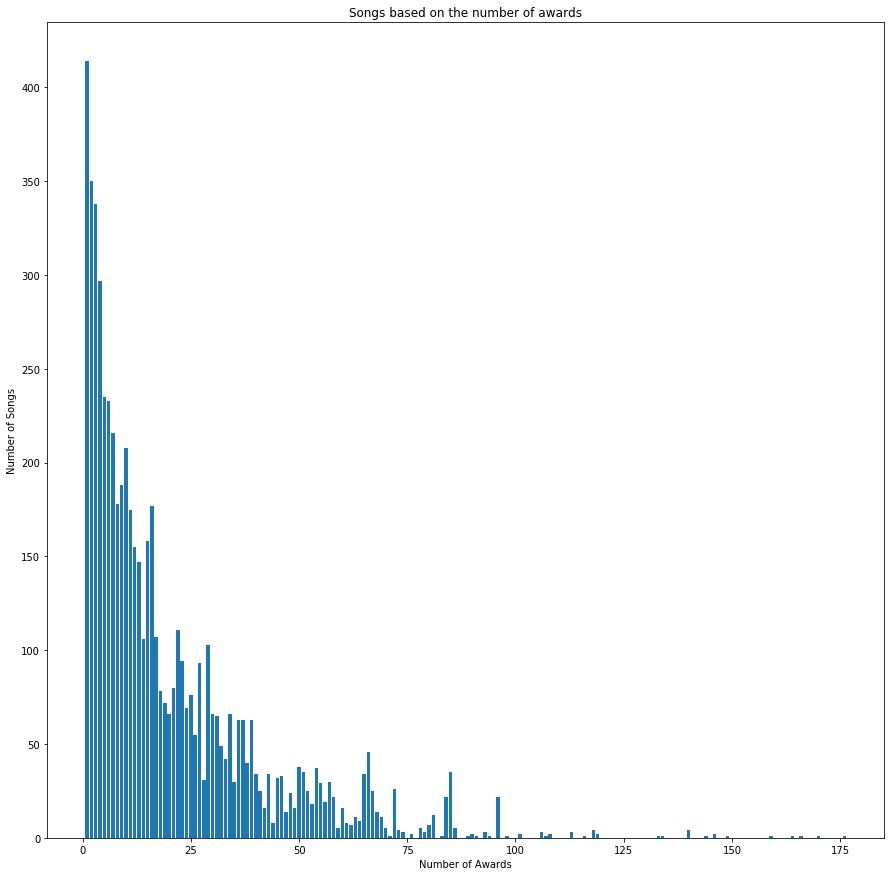

In [197]:

award_num = song_df[song_df["artist_has_award"] ==1].groupby("award_num").count()["artist"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Songs based on the number of awards")
plt.ylabel("Number of Songs")
plt.xlabel("Number of Awards")
plt.show()

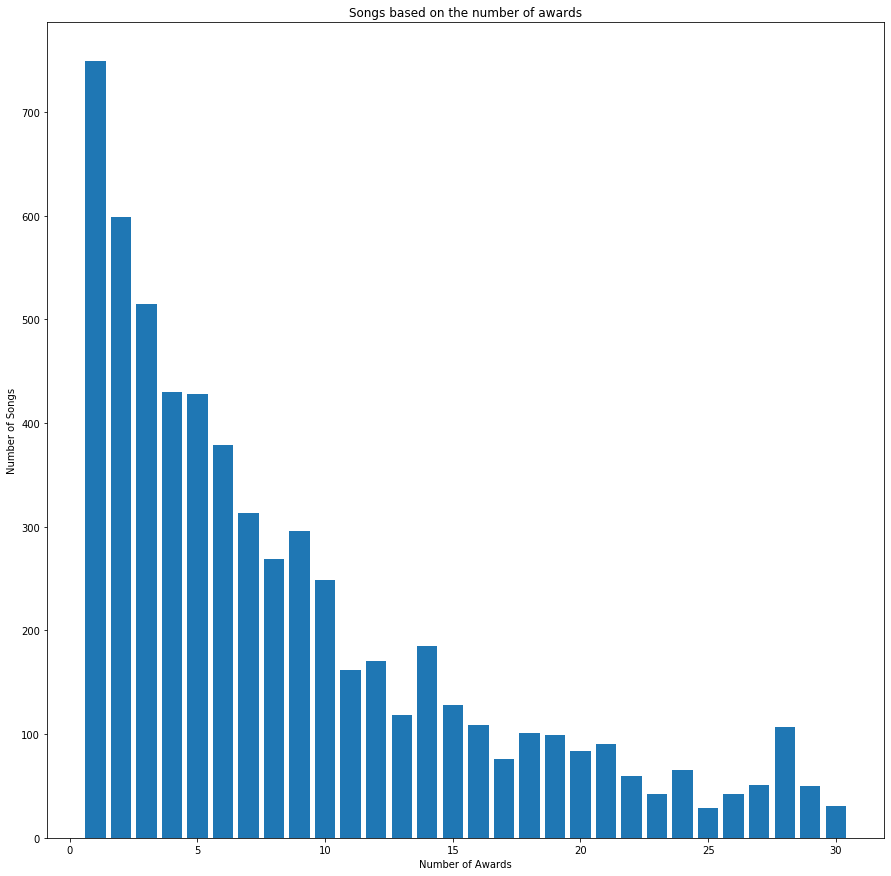

In [198]:
award_num = song_df[song_df["artist_has_award"] ==1].groupby("gold_count").count()["artist"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Songs based on the number of awards")
plt.ylabel("Number of Songs")
plt.xlabel("Number of Awards")
plt.show()

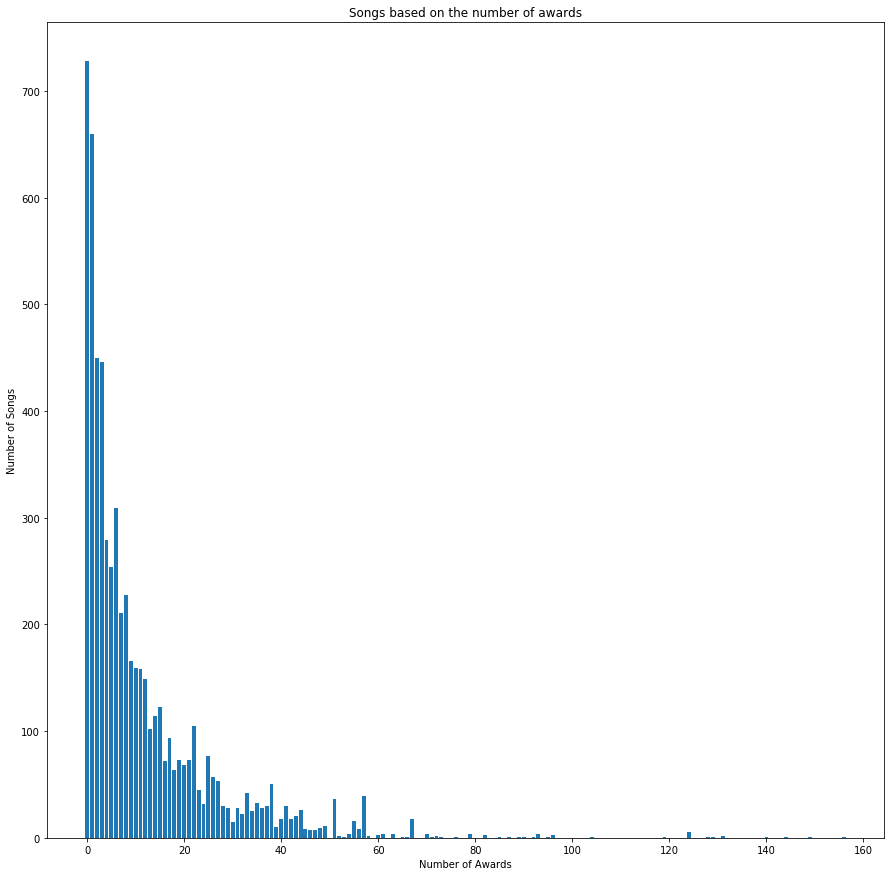

In [199]:
song_df["artist_has_award"] = song_df["award_num"] > 0
award_num = song_df[song_df["artist_has_award"] ==1].groupby("platinum_count").count()["artist"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Songs based on the number of awards")
plt.ylabel("Number of Songs")
plt.xlabel("Number of Awards")
plt.show()

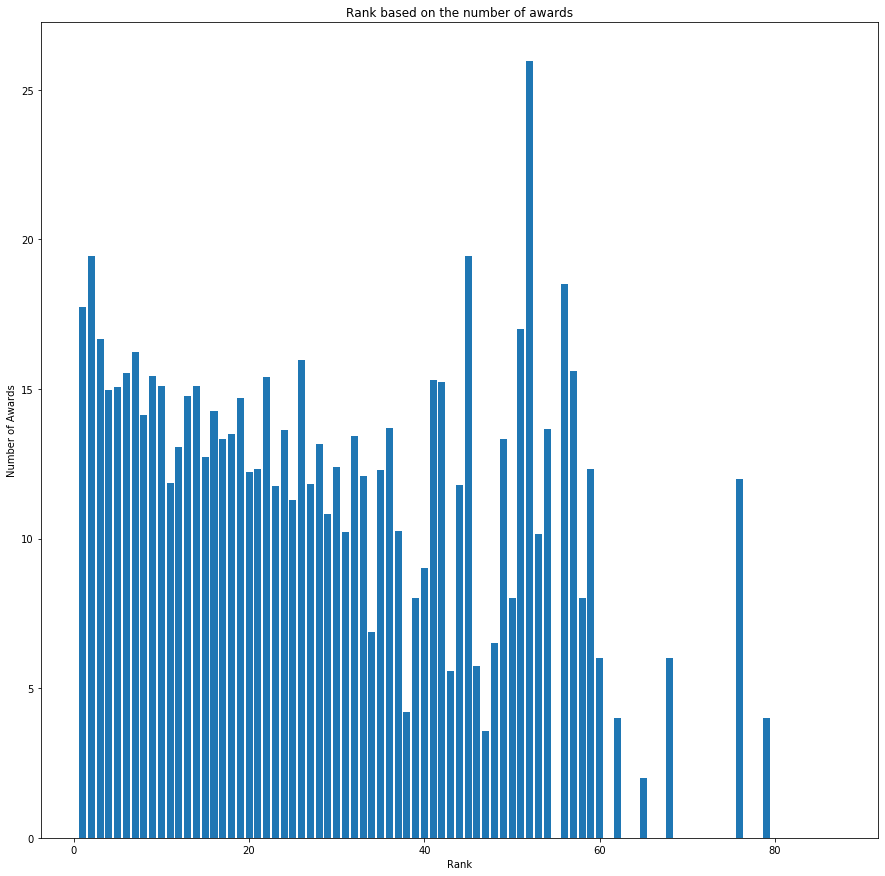

In [306]:
award_num = song_df.groupby("numberofappearances").mean()["award_num"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Rank based on the number of awards")
plt.ylabel("Number of Awards")
plt.xlabel("Rank")
plt.show()

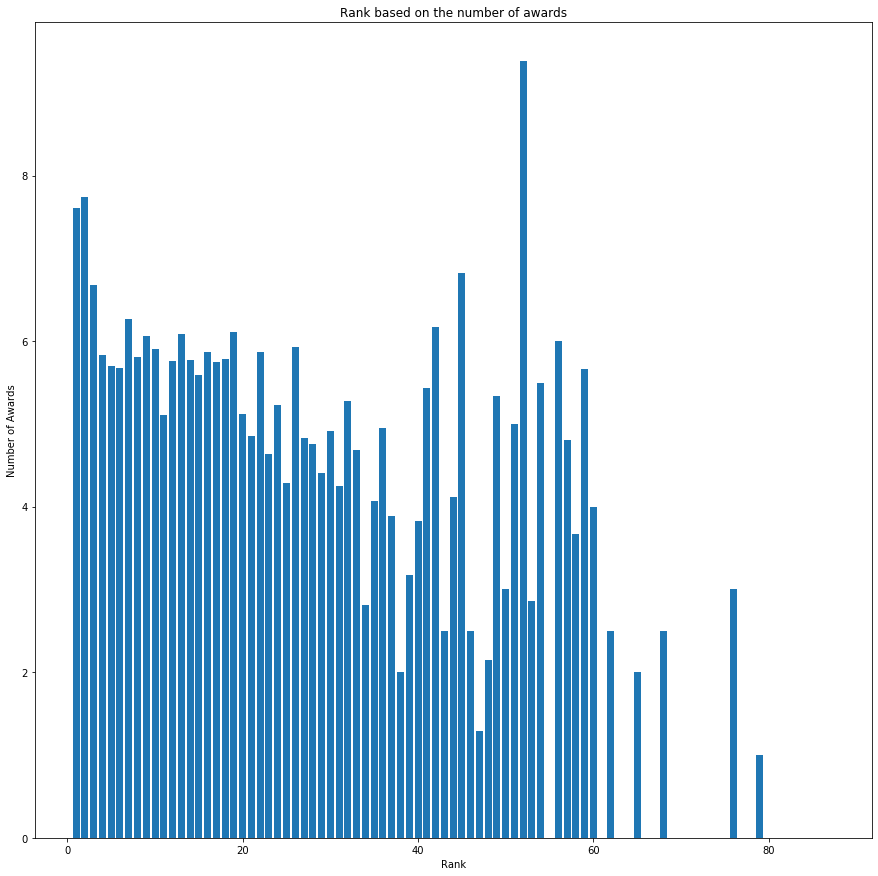

In [303]:
award_num = song_df.groupby("numberofappearances").mean()["num_songs_awards"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Rank based on the number of awards")
plt.ylabel("Number of Awards")
plt.xlabel("Rank")
plt.show()

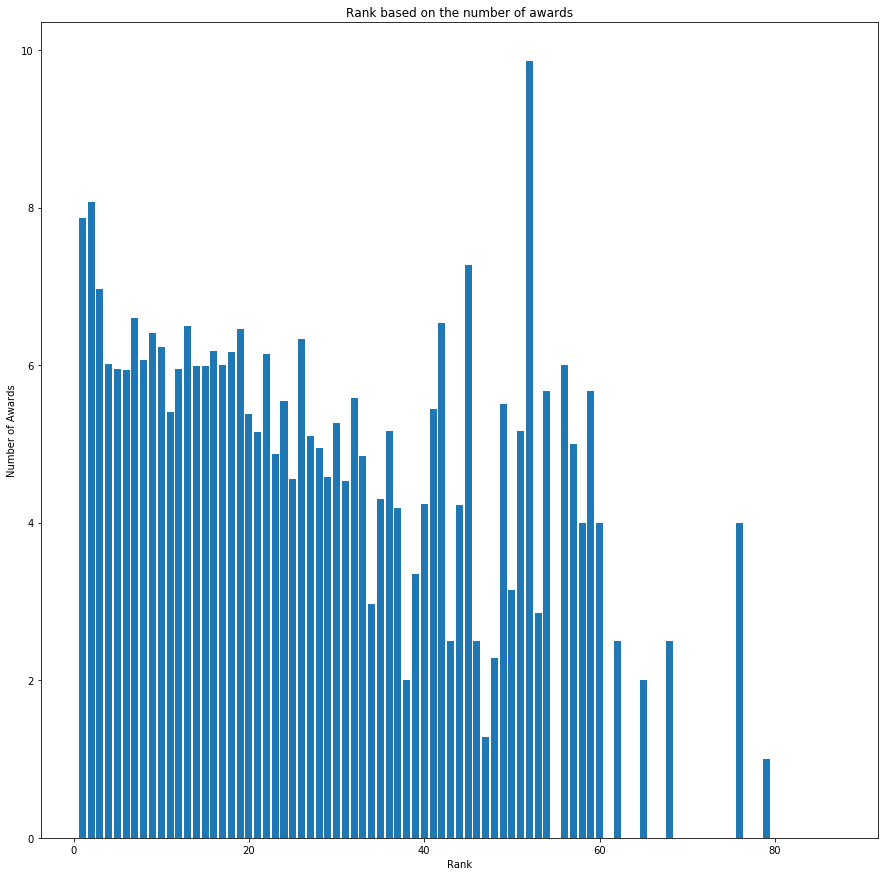

In [302]:
award_num = song_df.groupby("numberofappearances").mean()["gold_count"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Rank based on the number of awards")
plt.ylabel("Number of Awards")
plt.xlabel("Rank")
plt.show()

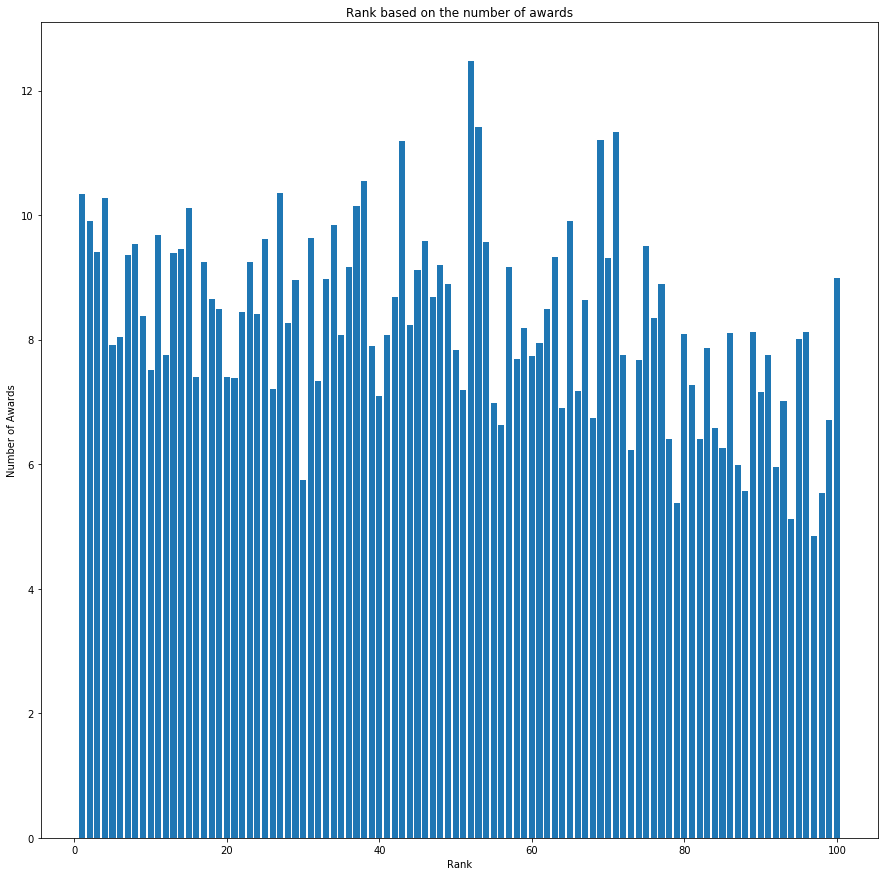

In [301]:
award_num = song_df.groupby("bestrank").mean()["platinum_count"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Rank based on the number of awards")
plt.ylabel("Number of Awards")
plt.xlabel("Rank")
plt.show()

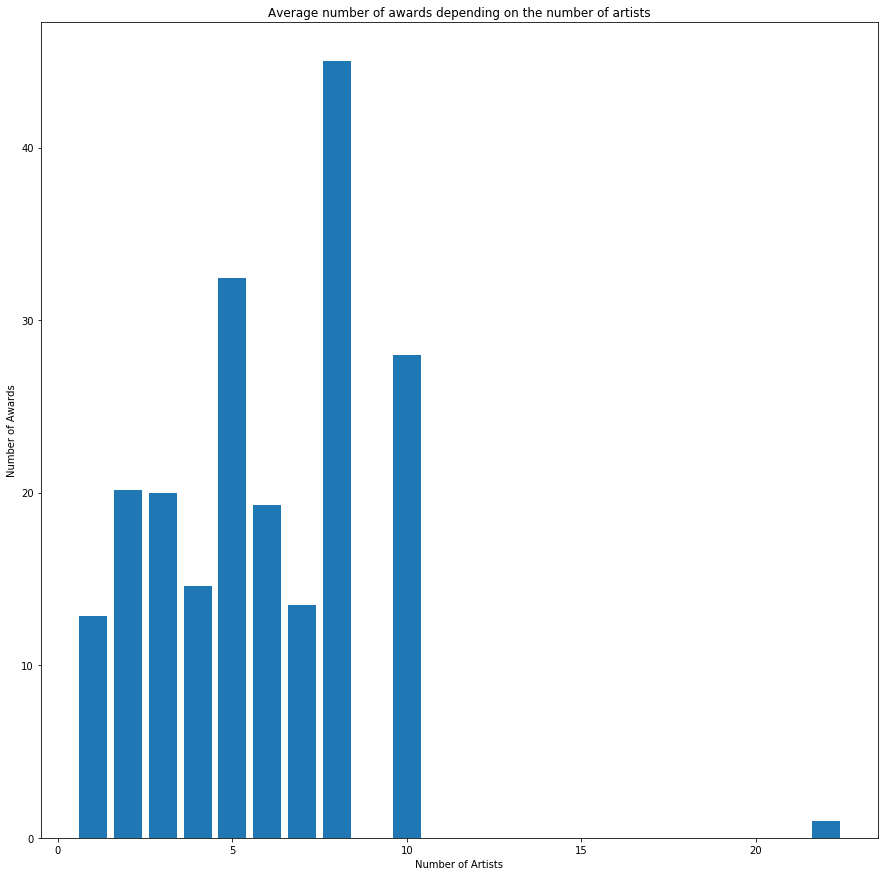

In [207]:
award_num = song_df.groupby("num_artists").mean()["award_num"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Average number of awards depending on the number of artists")
plt.ylabel("Number of Awards")
plt.xlabel("Number of Artists")
plt.show()

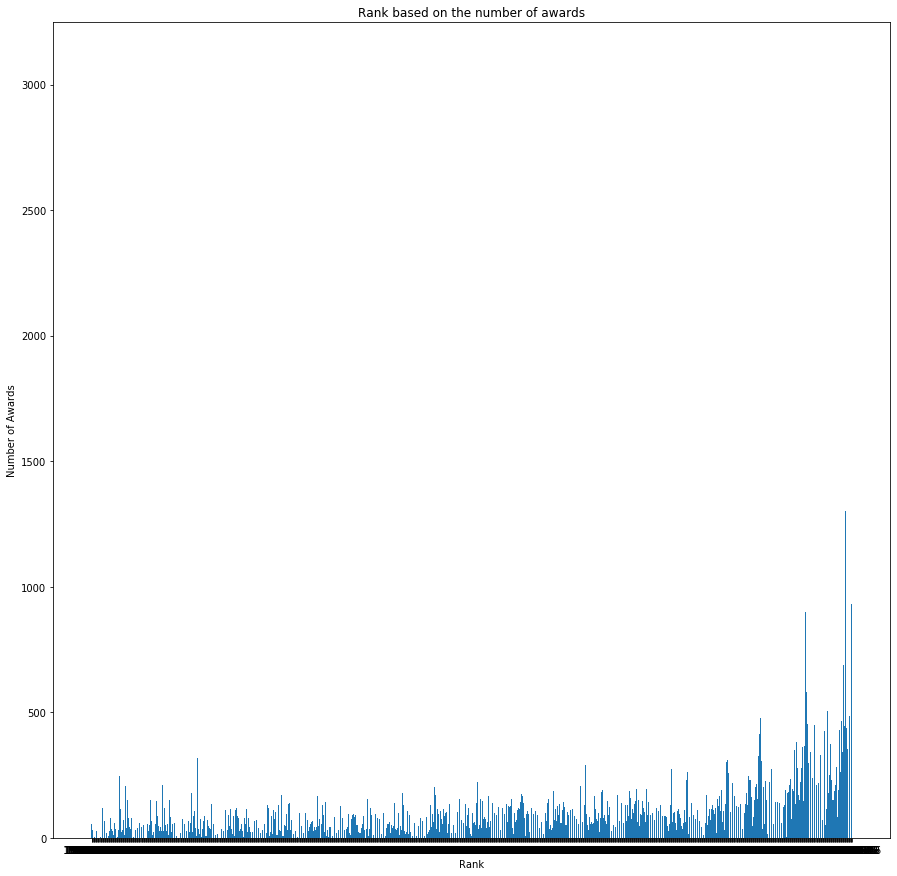

In [203]:
award_num = song_df.groupby("date").sum()["award_num"]
plt.figure(figsize=(15,15))
plt.bar(award_num.index,award_num)
plt.title("Rank based on the number of awards")
plt.ylabel("Number of Awards")
plt.xlabel("Rank")
plt.show()

In [292]:
with open('song_df_aggregate.pkl', 'wb') as f:
    pickle.dump(song_df, f)

In [229]:
song_df.groupby("album_label").count()["artist"].sort_values(ascending=False)

album_label
Columbia                  434
RCA Records Label         223
Warner Records            177
Atlantic Records          174
Epic                      158
                         ... 
Hi-Bias Records Inc.        1
Helta.                      1
Hanson Fox                  1
HITCO                       1
independently popular.      1
Name: artist, Length: 1250, dtype: int64

In [244]:
labels_occurence = list()
for i in np.asarray(song_df["album_label"]):
    if type(i) == str:
        label = i.split("/")
        for lab in label: 
            labels_occurence.append(lab.strip())

In [271]:
count_labels = list()
labels = set(labels_occurence)
for i in list(labels):
    count_labels.append([i,labels_occurence.count(i)])
label_df = pd.DataFrame(columns=["label","appearance_count"],data=count_labels)
label_df.sort_values("appearance_count",ascending=False)["appearance_count"][0:27].sum()

4089

In [273]:
with open('hot-100_chart_final.pkl', 'rb') as f:
        rec_df= pickle.load(f)       

In [280]:
rec_df["join"] = rec_df["artist"] + rec_df["title"]
rec_df = rec_df.sort_values("date",ascending=False).drop_duplicates(["artist","title"])

In [287]:
rec_df
#rec_df.pop("artist")
#rec_df.pop("isnew")
#rec_df.pop("rank")
#rec_df.pop("date")
#rec_df.pop("title")

,numberofappearances,bestrank,firstrank,join
0,26,1,85,Lewis CapaldiSomeone You Loved
25,16,26,94,Mustard Featuring Roddy RicchBallin'
24,36,1,1,Jonas BrothersSucker
49,10,50,99,Russell DickersonEvery Little Thing
3,27,1,50,LizzoTruth Hurts
...,...,...,...,...
113194,1,95,95,Sting & The PoliceRoxanne `97 - Puff Daddy Remix
113192,1,93,93,"PhajjaSo Long (Well, Well, Well)"
113178,1,79,79,Spice GirlsSpice Up Your Life
113147,1,48,48,Nu FlavorHeaven


In [290]:
song_df = song_df.merge(rec_df,on="join")

In [312]:
song_df[song_df["numberofappearances"]==20]

,artist,title,isnew,rank,date,spotify_id,spotify_explicit,spotify_duration_ms,spotify_disc_number,spotify_track_number,...,spotify_album_release_date_datetime,last_award_type,award_num,gold_count,platinum_count,artist_has_award,num_songs_awards,numberofappearances,bestrank,firstrank
2,Shawn Mendes & Camila Cabello,Senorita,False,3,2019-11-16,0TK2YIli7K1leLovkQiNik,False,190960.0,1.0,1.0,...,2019-06-21,Platinum,39.0,15.0,24.0,True,15.0,20,1,2
7,Lil Nas X,Panini,False,8,2019-11-16,6fTt0CH2t0mdeB2N9XFG5r,False,114893.0,1.0,2.0,...,2019-06-21,Platinum,4.0,1.0,3.0,True,1.0,20,5,16
39,Marshmello & Kane Brown,One Thing Right,False,40,2019-11-16,6oyjdvxHhDvLhq7EJaVNTV,False,181363.0,1.0,2.0,...,2019-08-09,Gold,20.0,9.0,11.0,True,9.0,20,36,57
79,Megan Thee Stallion Featuring DaBaby,Cash Shit,False,80,2019-11-16,2rMAtCaTj16NptyVfEIeAC,True,192539.0,1.0,4.0,...,2019-05-17,Gold,1.0,1.0,0.0,True,1.0,20,36,98
116,Blanco Brown,The Git Up,False,53,2019-11-02,2KKijf6Ett4kmVNJze2roh,False,200593.0,1.0,10.0,...,2019-10-10,Platinum,2.0,1.0,1.0,True,1.0,20,14,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393,The Verve,Bitter Sweet Symphony,False,77,1998-08-08,57iDDD9N9tTWe75x6qhStw,False,357266.0,1.0,1.0,...,1997-09-29,None,0.0,0.0,0.0,False,0.0,20,12,13
8398,"Master P Feat. Fiend, Silkk The Shocker, Mia X...",Make Em' Say Uhh!,False,46,1998-08-01,None,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,False,NaN,20,16,26
8399,Madonna,Frozen,False,56,1998-08-01,2II03llydk4YnkBBvoYB3B,False,367333.0,1.0,9.0,...,1998-03-03,Platinum,36.0,7.0,29.0,True,7.0,20,2,8
8400,Puff Daddy & The Family Featuring The Notoriou...,Victory,False,72,1998-08-01,2B9aYvlGefTIgKLhM6ia8t,True,296266.0,1.0,2.0,...,1997-01-01,Gold,3.0,2.0,1.0,True,2.0,20,19,50
